## Sahar Maher 
### Task 1

## Part 1: Data Parsing and Cleansing

#### 1. Parsing and Merging:

In [1]:
import pandas as pd
import os

def load_and_parse_file(file_path):
   
    try:
        df = pd.read_csv(file_path)
        return df
    except Exception as e:
        print(f"Error loading {file_path}: {e}")
        return pd.DataFrame()  # Return an empty DataFrame if there is an error

def consolidate_files(folder_path, output_file):
    """
    Consolidates all CSV files in the folder into a single CSV file.
    :param folder_path: Path to the folder containing the CSV files
    :param output_file: Path for the consolidated output file
    """
    all_data = []
    
    # Iterate through all files in the directory
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.csv'):  # Check if it's a CSV file
            file_path = os.path.join(folder_path, file_name)
            print(f"Parsing {file_path}")
            df = load_and_parse_file(file_path)
            if not df.empty:
                all_data.append(df)
    
    # Combine all DataFrames
    consolidated_data = pd.concat(all_data, ignore_index=True)
    
    # Save to a single CSV file
    consolidated_data.to_csv(output_file, index=False)
    print(f"Consolidated data saved to {output_file}")

# Usage
folder_path = r"C:\Users\DELL\Documents\DEBI\Sales_April_2019"  # Replace with your folder path
output_file = "result_data.csv"     # Replace with your desired output file name

consolidate_files(folder_path, output_file)

Parsing C:\Users\DELL\Documents\DEBI\Sales_April_2019\result_data.csv
Parsing C:\Users\DELL\Documents\DEBI\Sales_April_2019\Sales_April_2019.csv
Parsing C:\Users\DELL\Documents\DEBI\Sales_April_2019\Sales_August_2019.csv
Parsing C:\Users\DELL\Documents\DEBI\Sales_April_2019\Sales_December_2019.csv
Parsing C:\Users\DELL\Documents\DEBI\Sales_April_2019\Sales_February_2019.csv
Parsing C:\Users\DELL\Documents\DEBI\Sales_April_2019\Sales_January_2019.csv
Parsing C:\Users\DELL\Documents\DEBI\Sales_April_2019\Sales_July_2019.csv
Parsing C:\Users\DELL\Documents\DEBI\Sales_April_2019\Sales_June_2019.csv
Parsing C:\Users\DELL\Documents\DEBI\Sales_April_2019\Sales_March_2019.csv
Parsing C:\Users\DELL\Documents\DEBI\Sales_April_2019\Sales_May_2019.csv
Parsing C:\Users\DELL\Documents\DEBI\Sales_April_2019\Sales_November_2019.csv
Parsing C:\Users\DELL\Documents\DEBI\Sales_April_2019\Sales_October_2019.csv
Parsing C:\Users\DELL\Documents\DEBI\Sales_April_2019\Sales_September_2019.csv
Consolidated dat

In [2]:
df = pd.read_csv('result_data.csv')

In [3]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### 2. Data Cleansing:

In [4]:

def load_and_clean_file(file_path, date_column):
    
    try:
        # Load the file
        df = pd.read_csv(file_path)

        # Remove duplicate header rows
        df = df.drop_duplicates()
        # Cast columns to appropriate data types (example types - customize as needed)
        for column in df.columns:
            if column == date_column:
                df[column] = pd.to_datetime(df[column], errors='coerce')  # Convert date column to datetime
            else:
                df[column] = df[column].astype(str)  # Keep non-numeric columns as strings
        df['Quantity Ordered'] = df['Quantity Ordered'].astype('category')  # Convert numeric columns to numeric
        df['Price Each'] = pd.to_numeric(df['Price Each'], errors='coerce')
        df['Order ID'] = pd.to_numeric(df['Order ID'], errors='coerce')
    # Filter data for the year 2019
        if date_column in df.columns:
            df = df[df[date_column].dt.year == 2019]

        return df

    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return pd.DataFrame()  # Return an empty DataFrame in case of errors
file_path = 'result_data.csv'
date_column = 'Order Date'
df = load_and_clean_file(file_path, date_column)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185652 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185652 non-null  float64       
 1   Product           185652 non-null  object        
 2   Quantity Ordered  185652 non-null  category      
 3   Price Each        185652 non-null  float64       
 4   Order Date        185652 non-null  datetime64[ns]
 5   Purchase Address  185652 non-null  object        
dtypes: category(1), datetime64[ns](1), float64(2), object(2)
memory usage: 8.7+ MB


In [6]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558.0,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559.0,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560.0,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560.0,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561.0,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


#### 3. Data Transformation:

In [7]:
def extract_city_state(df, address_column):
    try:
        # Split the "Purchase Address" to extract city and state
        address_split = df[address_column].str.split(",", expand=True)
        
        # City is in the second-to-last segment
        df['City'] = address_split[address_split.columns[-2]].str.strip()
        
        # State is in the last segment, before the ZIP (if present)
        df['State'] = address_split[address_split.columns[-1]].str.split(" ", expand=True)[1].str.strip()

    except Exception as e:
        print(f"Error extracting City/State: {e}")
        df['City'] = None
        df['State'] = None

    return df


 # Extract City and State
extract_city_state(df, 'Purchase Address')



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,State
0,176558.0,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Dallas,TX
2,176559.0,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Boston,MA
3,176560.0,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,CA
4,176560.0,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,CA
5,176561.0,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Los Angeles,CA
...,...,...,...,...,...,...,...,...
186845,259353.0,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",Los Angeles,CA
186846,259354.0,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",San Francisco,CA
186847,259355.0,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",San Francisco,CA
186848,259356.0,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",San Francisco,CA


In [8]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,State
0,176558.0,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Dallas,TX
2,176559.0,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Boston,MA
3,176560.0,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,CA
4,176560.0,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,CA
5,176561.0,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Los Angeles,CA


In [9]:
def identify_granularity(df, order_id_column):
    """
    Identifies granularity of the data by grouping rows by Order ID.
    :param df: DataFrame containing the data
    :param order_id_column: Name of the column containing Order IDs
    :return: Summary DataFrame grouped by Order ID
    """
    try:
        # Group by Order ID and count the number of rows per order
        granularity = df.groupby(order_id_column).size().reset_index(name='Row Count Per Order')
        print(granularity.head())
    except Exception as e:
        print(f"Error identifying granularity: {e}")
identify_granularity(df, "Order ID")

   Order ID  Row Count Per Order
0  141234.0                    1
1  141235.0                    1
2  141236.0                    1
3  141237.0                    1
4  141238.0                    1


In [10]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,State
0,176558.0,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Dallas,TX
2,176559.0,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Boston,MA
3,176560.0,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,CA
4,176560.0,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,CA
5,176561.0,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Los Angeles,CA


#### 4. Data Enrichment:

In [11]:
unique_orders = df['Order ID'].nunique()
print(f"Total number of unique orders: {unique_orders}")



def map_product_to_category(df, product_column, category_dict):
   
    df['Category'] = df[product_column].map(category_dict)
    return df

# Define the product-category mapping
product_category = {
    'Google Phone': 'Mobiles',
    'iPhone': 'Mobiles',
    'Vareebadd Phone': 'Mobiles',
    'USB-C Charging Cable': 'Accessories',
    'Lightning Charging Cable': 'Accessories',
    'AA Batteries (4-pack)': 'Accessories',
    'AAA Batteries (4-pack)': 'Accessories',
    'Bose SoundSport Headphones': 'Headphones',
    'Wired Headphones': 'Headphones',
    'Apple Airpods Headphones': 'Headphones',
    'Macbook Pro Laptop': 'Laptops',
    'ThinkPad Laptop': 'Laptops',
    '27in 4K Gaming Monitor': 'Monitors',
    '27in FHD Monitor': 'Monitors',
    '20in Monitor': 'Monitors',
    '34in Ultrawide Monitor': 'Monitors',
    'Flatscreen TV': 'Home Appliances',
    'LG Dryer': 'Home Appliances',
    'LG Washing Machine': 'Home Appliances'
}

# Map products to categories
df = map_product_to_category(df, 'Product', product_category)

# Display final DataFrame
df.head()

Total number of unique orders: 178406


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,State,Category
0,176558.0,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Dallas,TX,Accessories
2,176559.0,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Boston,MA,Headphones
3,176560.0,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,CA,Mobiles
4,176560.0,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles,CA,Headphones
5,176561.0,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Los Angeles,CA,Headphones


## Part 2: Exploratory Data Analysis (EDA)

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
df.describe()  # Summary statistics


,Order ID,Price Each
count,185652.000000,185652.000000
mean,230397.332299,184.507245
std,51505.894713,332.834950
min,141234.000000,2.990000
25%,185824.750000,11.950000
50%,230339.500000,14.950000
75%,275005.250000,150.000000
max,319670.000000,1700.000000


perform univariate analysis
Plot bar chart for categorical data


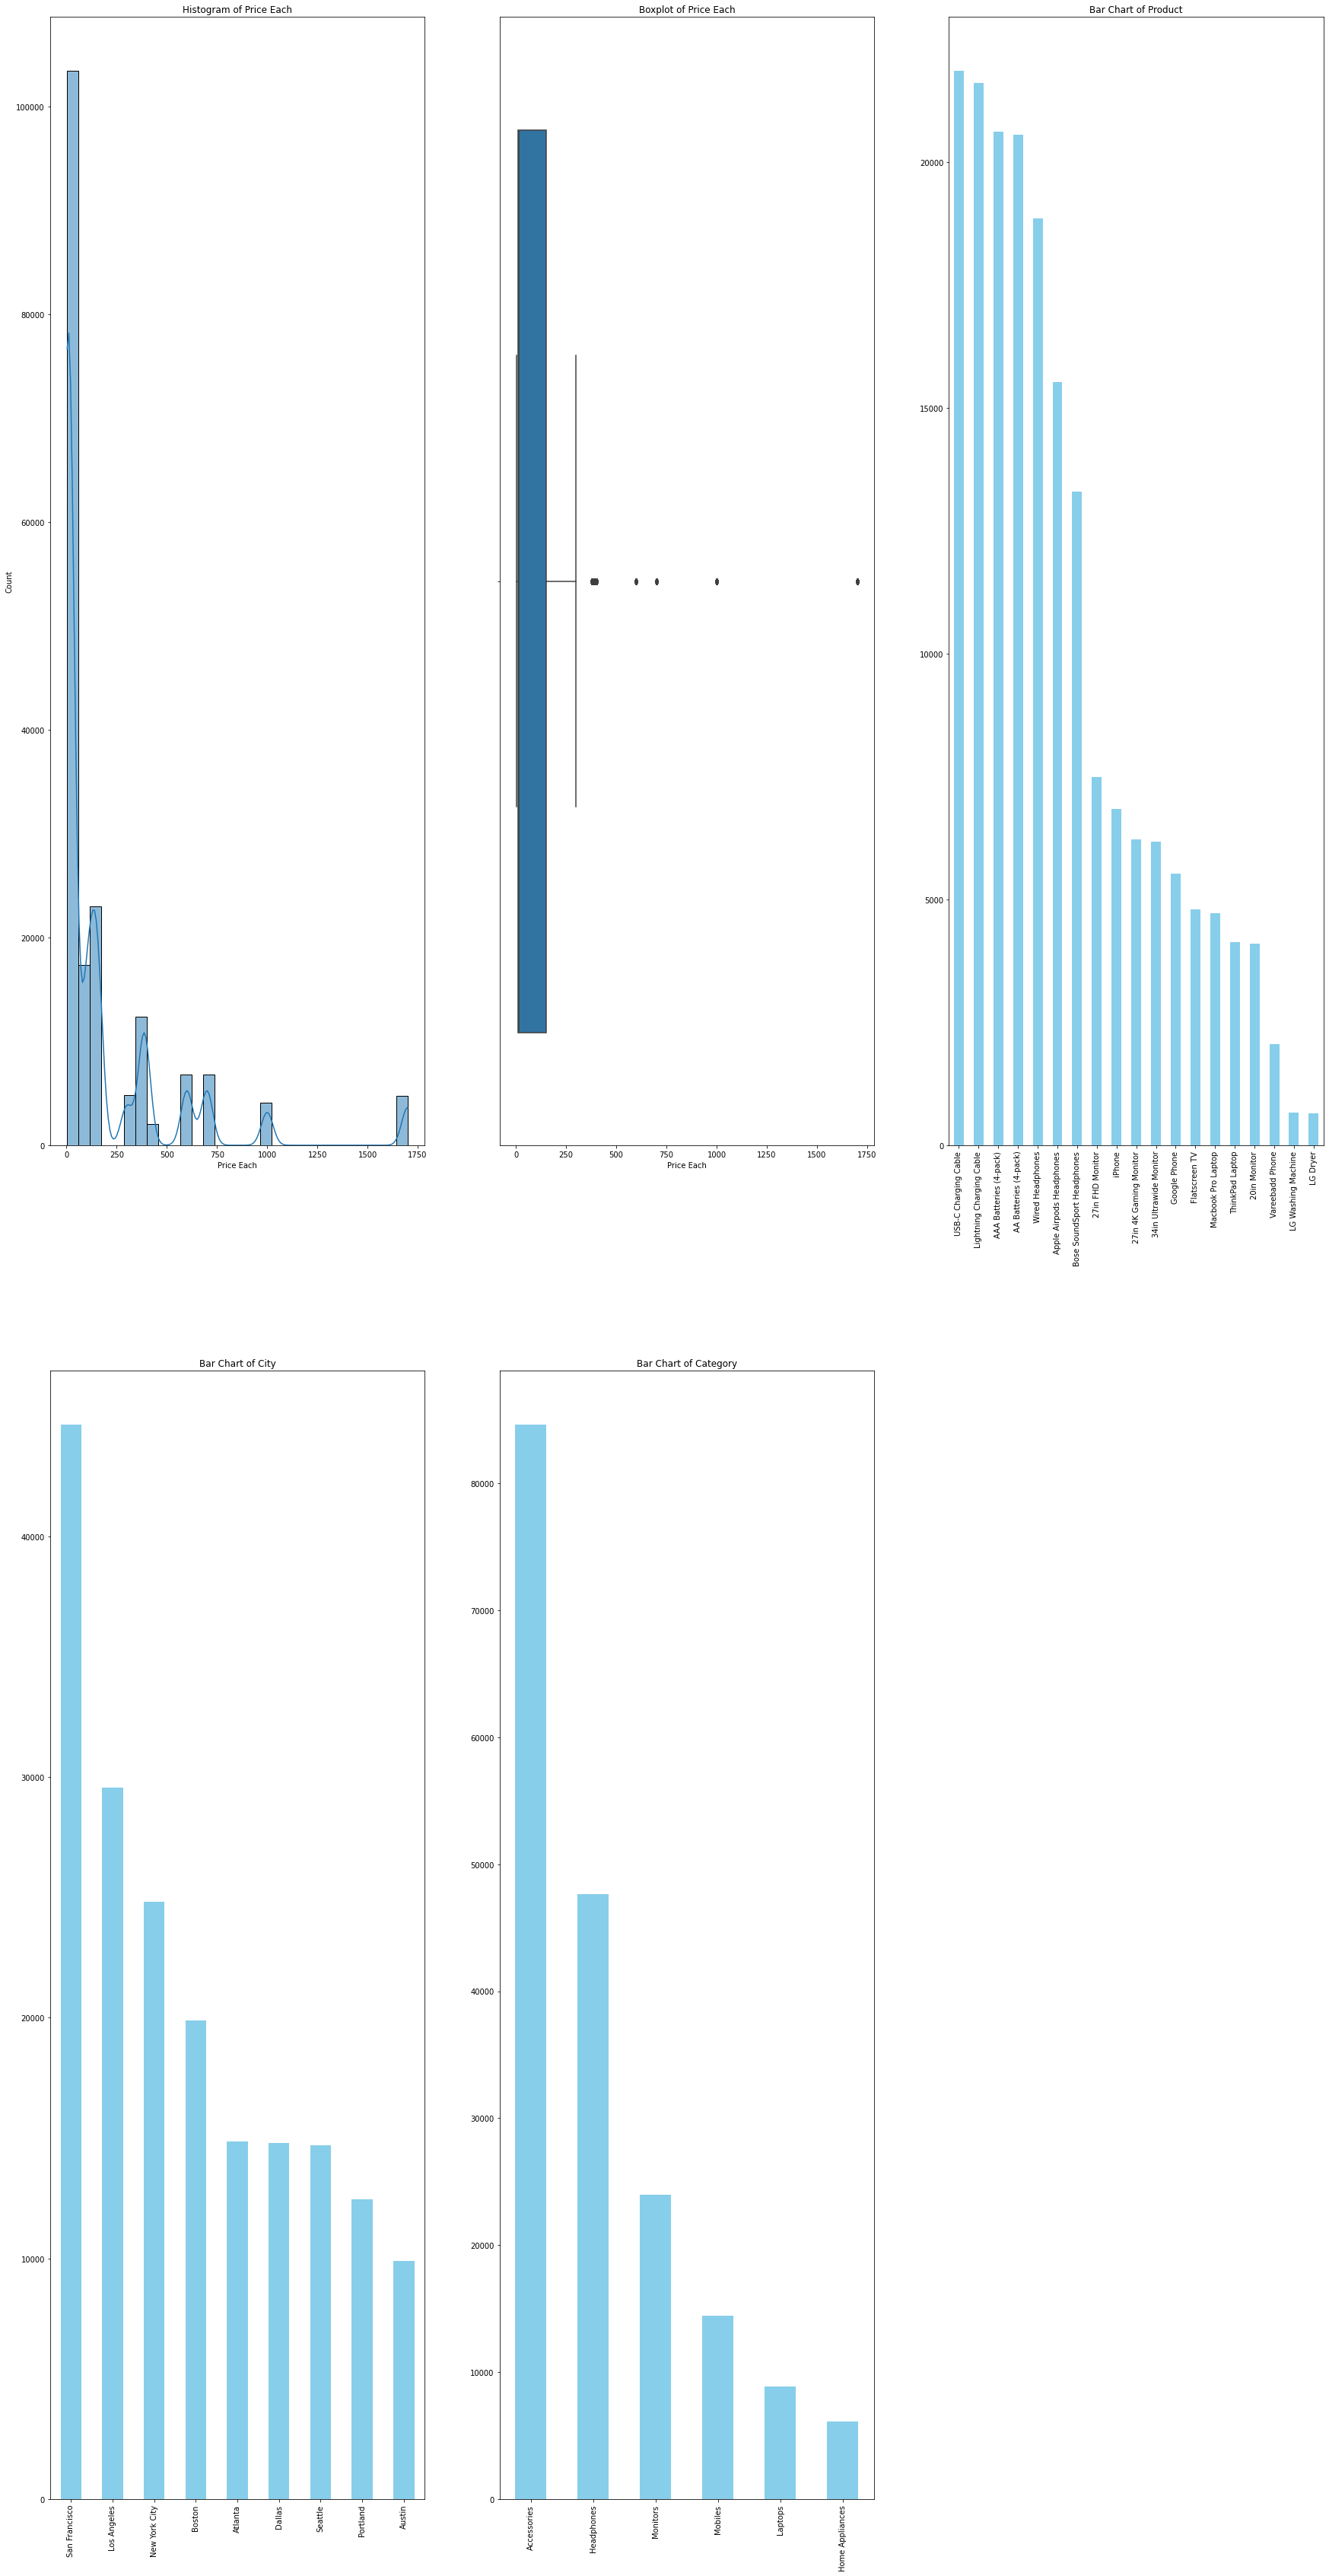

In [13]:
# Plot histogram and boxplot for numerical data
print ('perform univariate analysis')
plt.figure(figsize=(30, 60))
            

plt.subplot(2, 3, 1)
sns.histplot(df['Price Each'], kde=True, bins=30)
plt.title(f"Histogram of Price Each")
            
plt.subplot(2, 3, 2)
sns.boxplot(x=df['Price Each'])
plt.title(f"Boxplot of Price Each")

print('Plot bar chart for categorical data')


plt.subplot(2, 3, 3)
df['Product'].value_counts().plot(kind='bar', color='skyblue')
plt.title(f"Bar Chart of Product")
            
plt.subplot(2, 3, 4)
df['City'].value_counts().plot(kind='bar', color='skyblue')
plt.title(f"Bar Chart of City")

plt.subplot(2, 3, 5)
df['Category'].value_counts().plot(kind='bar', color='skyblue')
plt.title(f"Bar Chart of Category")
            
plt.show()





Bivariate Analysis
------------------------------

Scatter Plot: Order ID vs Price Each


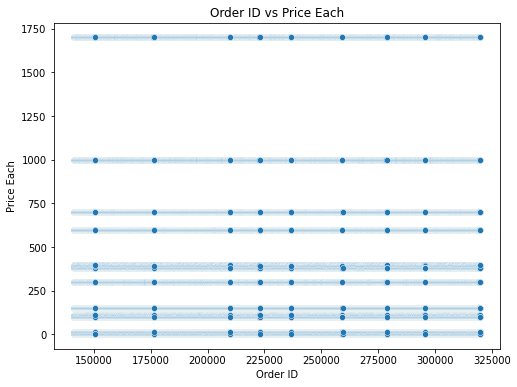

Correlation between Order ID and Price Each: -0.00


In [14]:
print("\nBivariate Analysis\n" + "-"*30)
# Numerical vs. Numerical
num_columns = df.select_dtypes(include=['number']).columns
for i, col1 in enumerate(num_columns):
    for col2 in num_columns[i+1:]:
            print(f"\nScatter Plot: {col1} vs {col2}")
            plt.figure(figsize=(8, 6))
            sns.scatterplot(data=df, x=col1, y=col2)
            plt.title(f"{col1} vs {col2}")
            plt.show()
            correlation = df[col1].corr(df[col2])
            print(f"Correlation between {col1} and {col2}: {correlation:.2f}")

## Part 3: Business Questions


### 1. Product Analysis:

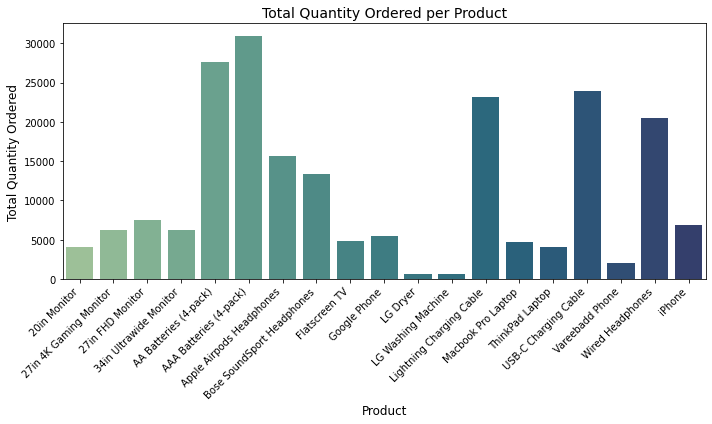

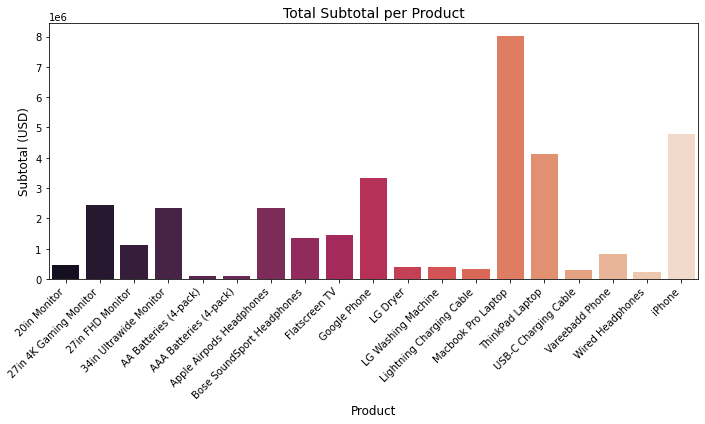

In [16]:
# Step 1: Product with the highest quantity ordered
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce')
df['Subtotal'] = df['Quantity Ordered'] * df['Price Each']
product_quantity = df.groupby('Product')['Quantity Ordered'].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=product_quantity.index, y=product_quantity.values, palette="crest")
plt.title('Total Quantity Ordered per Product', fontsize=14)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Total Quantity Ordered', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Step 2: Product generating the highest revenue
product_revenue = df.groupby('Product')['Subtotal'].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=product_revenue.index, y=product_revenue.values, palette="rocket")
plt.title('Total Subtotal per Product', fontsize=14)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Subtotal (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### As we see that the heighest Quantity Ordered Product is AAA Batteries so it is the best saller But the product with the  Heighest profit  is Mac book pro laptop and the obviously because of its price

2. Trend Analysis:
- Analyze weekly trends to determine the number of orders placed during weekends.
- Identify preferred months for customer orders.

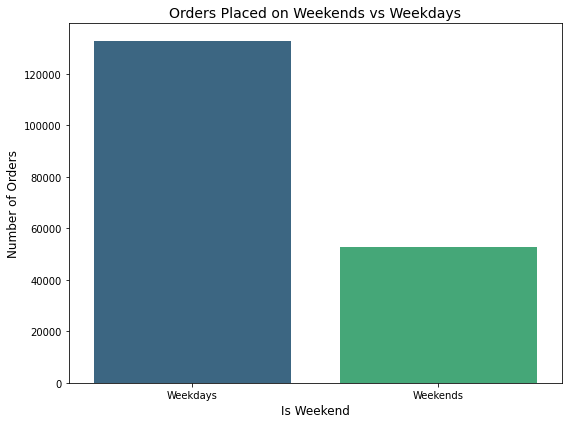

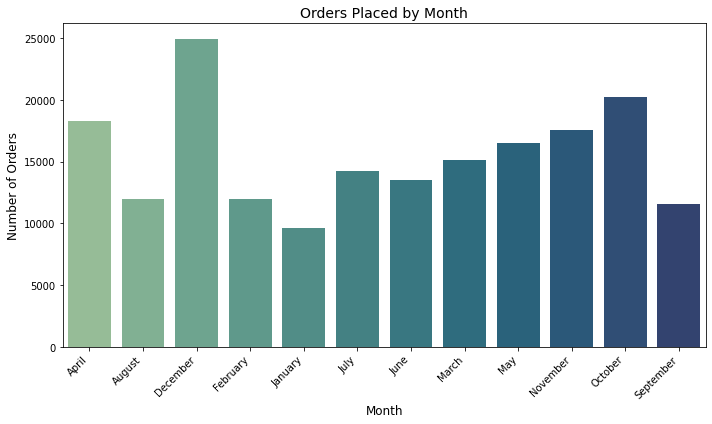

In [17]:
# Add day of the week and month columns
df['Day of Week'] = df['Order Date'].dt.day_name()
df['Month'] = df['Order Date'].dt.month_name()

# Add a column to indicate if the order was placed on a weekend
df['Is Weekend'] = df['Day of Week'].isin(['Saturday', 'Friday'])

# Step 1: Analyze Orders on Weekends
weekend_orders = df['Is Weekend'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=weekend_orders.index, y=weekend_orders.values, palette="viridis")
plt.title('Orders Placed on Weekends vs Weekdays', fontsize=14)
plt.xlabel('Is Weekend', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks([0, 1], ['Weekdays', 'Weekends'])
plt.tight_layout()
plt.show()

# Step 2: Analyze Monthly Trends
monthly_orders = df.groupby('Month').size().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_orders.index, y=monthly_orders.values, palette="crest")
plt.title('Orders Placed by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### as we notice that people prefere shopping in weekdays rather than week ends also they do shopping mostley in december and its clearly because of christmas

### 3. Hourly Analysis:


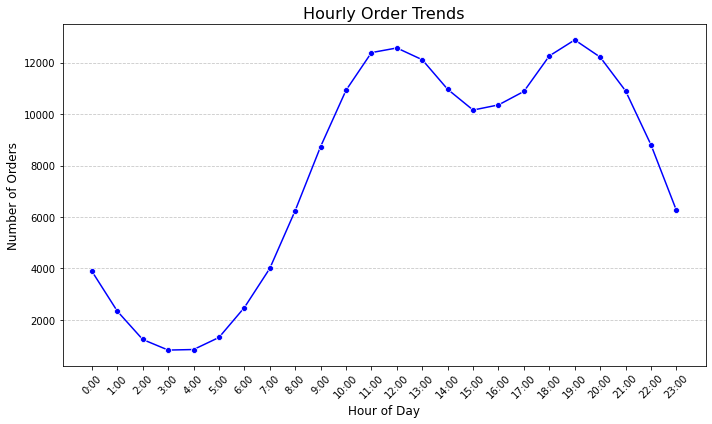

The peak hour is 19:00 with 12886 orders.


In [18]:
# Extract the hour from the Order Date
df['Hour'] = df['Order Date'].dt.hour

# Count orders by hour
hourly_orders = df.groupby('Hour').size()

# Plot hourly trends
plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_orders.index, y=hourly_orders.values, marker="o", color="blue")
plt.title('Hourly Order Trends', fontsize=16)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(range(0, 24), labels=[f"{h}:00" for h in range(0, 24)], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Highlight peak hours
peak_hour = hourly_orders.idxmax()
peak_orders = hourly_orders.max()
print(f"The peak hour is {peak_hour}:00 with {peak_orders} orders.")


### as we see that people go shopping at 17 and 12 and at this time they even in a break or end their work

### 4. Customer Loyalty:
- Identify the most loyal customers by analyzing:
- The customer with the highest number of orders.
- The customer generating the highest revenue.

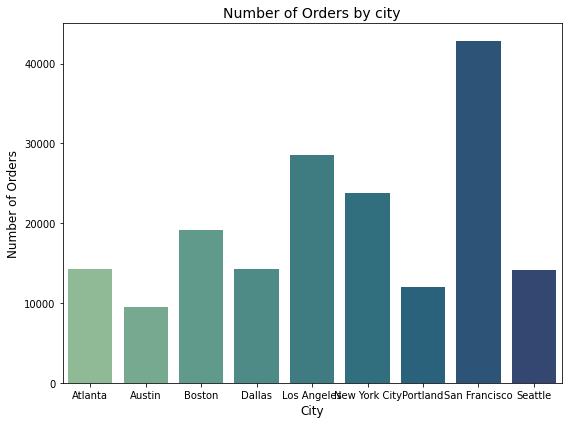

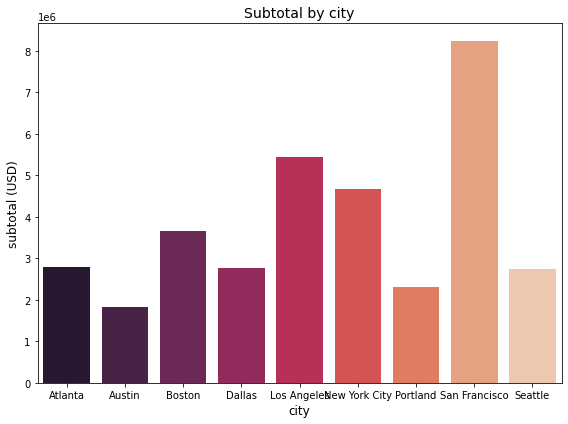

The most loyal city by orders is San Francisco with 42887 orders.
The most valuable city by revenue is San Francisco with a total revenue of $8252258.67.


In [19]:
# Step 1: Customer with the highest number of orders
customer_order_count = df.groupby('City')['Order ID'].nunique()

# Plot for highest number of orders
plt.figure(figsize=(8, 6))
sns.barplot(x=customer_order_count.index, y=customer_order_count.values, palette="crest")
plt.title('Number of Orders by city', fontsize=14)
plt.xlabel('City' , fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.tight_layout()
plt.show()

# Step 2: Customer generating the highest revenue
customer_revenue = df.groupby('City')['Subtotal'].sum()

# Plot for highest revenue
plt.figure(figsize=(8, 6))
sns.barplot(x=customer_revenue.index, y=customer_revenue.values, palette="rocket")
plt.title('Subtotal by city', fontsize=14)
plt.xlabel('city', fontsize=12)
plt.ylabel('subtotal (USD)', fontsize=12)
plt.tight_layout()
plt.show()

# Identify most loyal customers
top_customer_orders = customer_order_count.idxmax()
top_orders_count = customer_order_count.max()

top_customer_revenue = customer_revenue.idxmax()
top_revenue_amount = customer_revenue.max()

print(f"The most loyal city by orders is {top_customer_orders} with {top_orders_count} orders.")
print(f"The most valuable city by revenue is {top_customer_revenue} with a total revenue of ${top_revenue_amount:.2f}.")

### 5. Geographical Analysis:
- For each city and state, identify the most preferred product category.

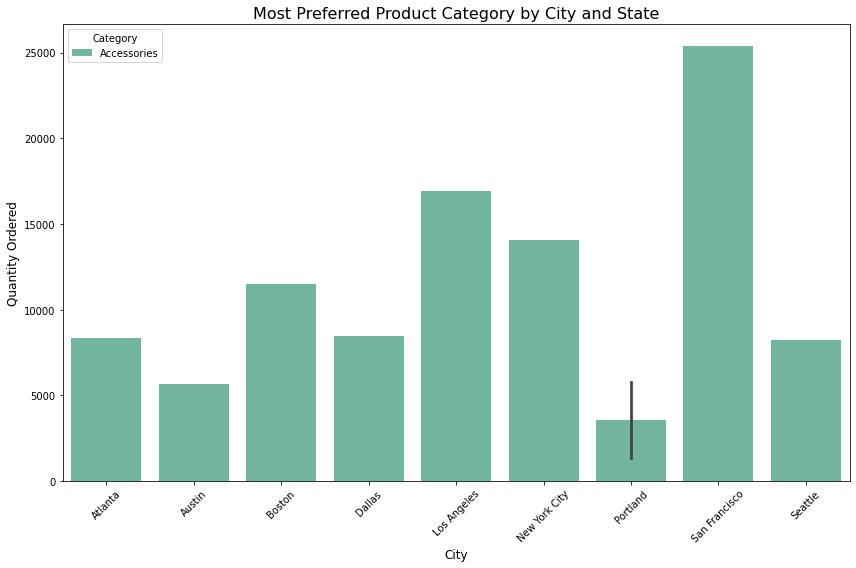

             City State     Category  Quantity Ordered
0         Atlanta    GA  Accessories              8337
6          Austin    TX  Accessories              5644
12         Boston    MA  Accessories             11504
18         Dallas    TX  Accessories              8470
24    Los Angeles    CA  Accessories             16933
30  New York City    NY  Accessories             14041
36       Portland    ME  Accessories              1354
42       Portland    OR  Accessories              5770
48  San Francisco    CA  Accessories             25374
54        Seattle    WA  Accessories              8259


In [20]:
# Step 1 group data by city and state to find the most preferred category
city_state_category = df.groupby(['City', 'State', 'Category'])['Quantity Ordered'].sum().reset_index()

# Find the most preferred category for each city and state
most_preferred_category = city_state_category.loc[
    city_state_category.groupby(['City', 'State'])['Quantity Ordered'].idxmax()
]

# Step 2: Visualization
plt.figure(figsize=(12, 8))
sns.barplot(data=most_preferred_category, x='City', y='Quantity Ordered', hue='Category', palette="Set2")
plt.title('Most Preferred Product Category by City and State', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Quantity Ordered', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.tight_layout()
plt.show()

# Display the most preferred categories
print(most_preferred_category)


### as we can see that Accessories is the most product category prefered